In [4]:
import numpy as np
import pandas as pd
import re, nltk

# Sklearn
'''
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
'''

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

#import K mean custering lib
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

In [5]:
data_clean = pd.read_pickle('data_clean_allrecipe.pkl')
data_clean.head()
dtm = pd.read_pickle("dtm_allrecipe.pkl")
#dtm

In [7]:
df = data_clean.ingredient
#list(df[1])

In [40]:
#applying tf-idf
# list of text documents
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(data_clean['ingredient'])
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(data_clean['ingredient'])
# We rename and use it in Kmeans clustering
tfidf_model =vector  
#print(vector)
# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())
terms = vectorizer.get_feature_names()
#print(terms)
sums = vector.sum(axis=0)
# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['items','rank'])
print(ranking.sort_values('rank', ascending=False))

d=ranking.sort_values('rank', ascending=False)
d


  (0, 4068)	0.3936444912790178
  (0, 3829)	0.2808355254221051
  (0, 2808)	0.4014055203280222
  (0, 2334)	0.45137694866554784
  (0, 1224)	0.13199681270727615
  (0, 803)	0.4089210147530633
  (0, 632)	0.3124043603638016
  (0, 548)	0.34506787935748495
  (1, 4053)	0.23868357111459748
  (1, 3909)	0.18077485689307635
  (1, 3660)	0.3285454515815946
  (1, 2987)	0.2907743356210318
  (1, 2334)	0.36561871293500814
  (1, 1921)	0.3119770929851364
  (1, 1046)	0.37707027633929213
  (1, 383)	0.5740461912022395
  (1, 382)	0.1230487840507472
  (2, 3909)	0.1851635062881189
  (2, 3328)	0.5236054612992127
  (2, 3239)	0.12530554104752376
  (2, 1921)	0.31955092323967327
  (2, 1133)	0.3419007922808666
  (2, 1124)	0.48026655098355103
  (2, 632)	0.25919313564208235
  (2, 507)	0.3783110530698448
  :	:
  (22320, 382)	0.13967375777573274
  (22320, 340)	0.5251812561822339
  (22320, 103)	0.4159347851745542
  (22321, 3931)	0.4756400800117115
  (22321, 3513)	0.1075684132287887
  (22321, 2329)	0.18057332462598527
  (223

,items,rank
3513,sugar,2023.351620
1224,egg,1545.392928
382,butter,1531.718240
1402,flour,1513.851328
3239,salt,1389.773572
3887,vanilla,1211.948133
2329,milk,988.125926
742,cinnamon,908.944744
157,baking_powder,860.261038
3909,vanilla_extract,788.642152


In [33]:
#Creating dictionary from the dataframe  (data_f_tup = [tuple(x) for x in d.values])
data_f = {x[0]: int(x[1]) for x in d.values}
data_f

{'sugar': 2023,
 'egg': 1545,
 'butter': 1531,
 'flour': 1513,
 'salt': 1389,
 'vanilla': 1211,
 'milk': 988,
 'cinnamon': 908,
 'baking_powder': 860,
 'vanilla_extract': 788,
 'water': 768,
 'brown_sugar': 741,
 'baking_soda': 710,
 'margarine': 562,
 'lemon_juice': 561,
 'cream_cheese': 547,
 'egg_white': 528,
 'egg_yolk': 518,
 'granulated_sugar': 505,
 'nutmeg': 490,
 'pecan': 489,
 'powdered_sugar': 473,
 'walnut': 450,
 'unsalted_butter': 447,
 'nut': 412,
 'shortening': 410,
 'cornstarch': 391,
 'almond': 376,
 'whipping_cream': 375,
 'confectioner_sugar': 372,
 'raisin': 369,
 'chocolate': 347,
 'heavy_cream': 345,
 'apple': 330,
 'cocoa': 317,
 'sour_cream': 314,
 'strawberry': 304,
 'lemon': 289,
 'ginger': 289,
 'peanut_butter': 286,
 'coconut': 282,
 'clove': 277,
 'honey': 275,
 'almond_extract': 275,
 'chocolate_chip': 263,
 'cream': 250,
 'orange_juice': 232,
 'cream_tartar': 221,
 'semisweet_chocolate': 217,
 'unsweetened_chocolate': 212,
 'oil': 211,
 'buttermilk': 211

In [6]:
from wordcloud import WordCloud
wc = WordCloud()

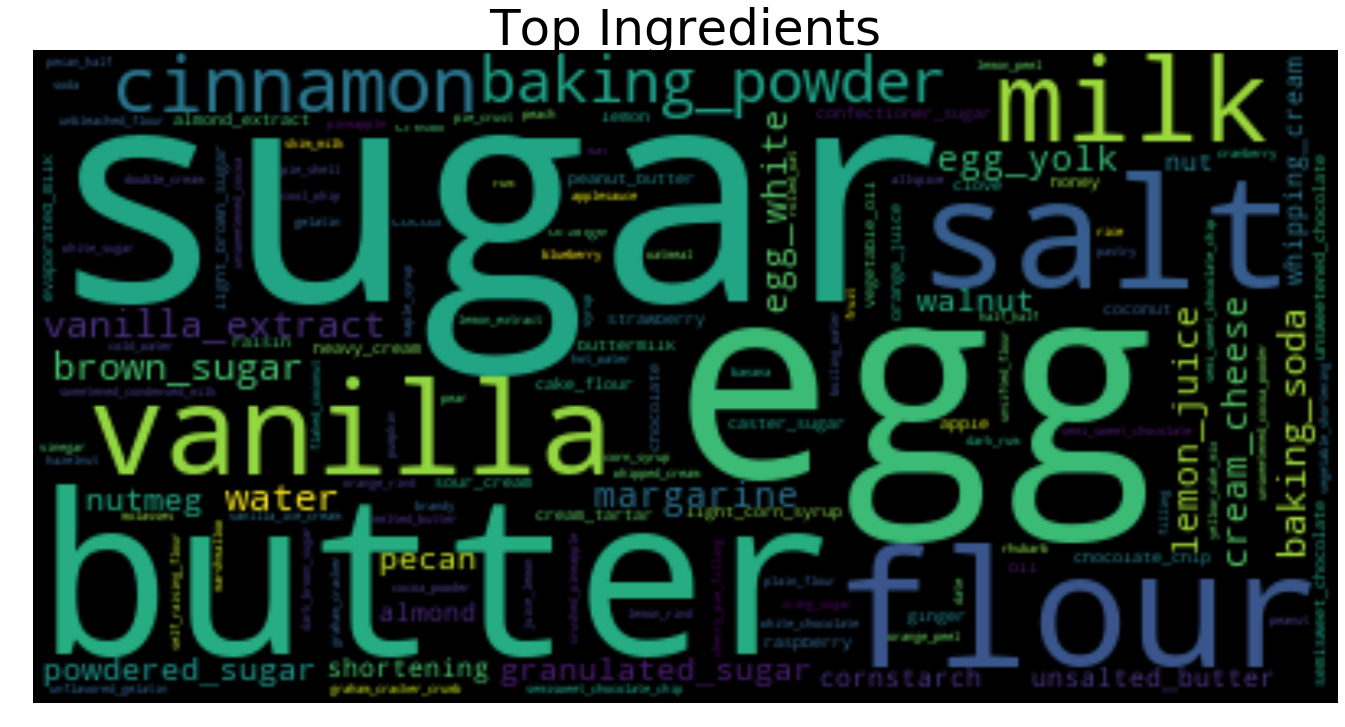

In [180]:
wc.generate_from_frequencies(data_f)
#wc.fit_words(data_f) #(data_f)
plt.figure( figsize=(25,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Top Ingredients',fontsize=50)
plt.show()

In [9]:
#Applying clustering
import collections

clusters = 10
km_model = KMeans(n_clusters=clusters)
km_model.fit(tfidf_model)
clustering = collections.defaultdict(list)
for idx, label in enumerate(km_model.labels_):
    clustering[label].append(idx)
clustering

defaultdict(list,
            {8: [0,
              3,
              5,
              6,
              9,
              10,
              11,
              13,
              14,
              15,
              17,
              22,
              24,
              25,
              26,
              27,
              37,
              38,
              39,
              43,
              45,
              47,
              48,
              49,
              50,
              51,
              52,
              57,
              58,
              61,
              66,
              68,
              73,
              76,
              79,
              81,
              83,
              84,
              85,
              87,
              90,
              91,
              92,
              95,
              99,
              100,
              102,
              103,
              107,
              108,
              111,
              112,
              114,
              116,
   

In [14]:
print("Top terms per cluster:")
order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :clusters]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["clove"])
prediction = km_model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 egg_white
 sugar
 egg_yolk
 cream_tartar
 salt
 vanilla
 water
 lemon_juice
 flour
 butter
Cluster 1:
 strawberry
 sugar
 water
 lemon_juice
 whipping_cream
 cornstarch
 blueberry
 rhubarb
 butter
 heavy_cream
Cluster 2:
 sugar
 water
 butter
 egg
 milk
 lemon_juice
 vanilla
 salt
 whipping_cream
 unsalted_butter
Cluster 3:
 margarine
 flour
 sugar
 egg
 vanilla
 salt
 brown_sugar
 baking_powder
 baking_soda
 cinnamon
Cluster 4:
 peanut_butter
 peanut
 vanilla
 butter
 brown_sugar
 sugar
 egg
 milk
 margarine
 baking_soda
Cluster 5:
 vanilla_extract
 butter
 egg
 sugar
 salt
 flour
 baking_powder
 milk
 baking_soda
 granulated_sugar
Cluster 6:
 flour
 vanilla
 butter
 sugar
 egg
 salt
 baking_powder
 milk
 baking_soda
 brown_sugar
Cluster 7:
 cinnamon
 nutmeg
 flour
 clove
 salt
 sugar
 ginger
 baking_soda
 brown_sugar
 egg
Cluster 8:
 caster_sugar
 lemon
 plain_flour
 egg
 butter
 sugar
 self_raising_flour
 almond
 double_cream
 milk
Cluster 9:
 crea

In [13]:
#tdm=dtm.transpose()
#items_no=tdm.index.transpose()
#items_no=items_no[:]
#items_no
print("\n")
print("Prediction")

Y = vectorizer.transform(["coffee"])
prediction = km_model.predict(Y)
print(prediction)



Prediction
[2]


<Figure size 432x288 with 0 Axes>

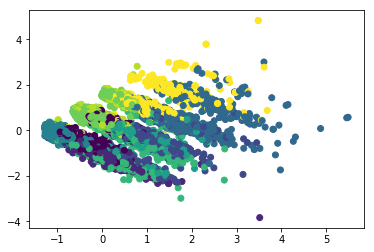

In [41]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl
pca = PCA(n_components=5).fit(dtm)
pca_2d = pca.transform(dtm)
pl.figure('Reference Plot')
#pl.scatter(pca_2d[:, 0], pca_2d[:, 1])
clusters = 10
kmeans = KMeans(n_clusters=clusters, random_state=111)
kmeans.fit(dtm)
kmeans.transform(dtm)
pl.figure('K-means with 10 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, label=terms)
pl.show()

In [ ]:
#Way to check how many PCA dimention is enough for eg. if no of dimension is 3 and the sum of first two variance
ex_variance=np.var(pca_2d,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio 
#kmeans.labels_

In [15]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = dtm[:,1]
for i in range(clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :clusters]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["clove"])
prediction = kmean.predict(Y)
print(prediction)

Top terms per cluster:


TypeError: unhashable type: 'slice'